Датасет для анализа: https://www.kaggle.com/mirichoi0218/insurance

# Content

### Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Проверим датасет на отсутствующие значения, при возможности однозначной замены произведём её


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Распределение по регионам примерно одинаковое с небольшим перевесом юго-востока, проверим распределение стоимости страховки в целом и по ригионам в отдельности

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

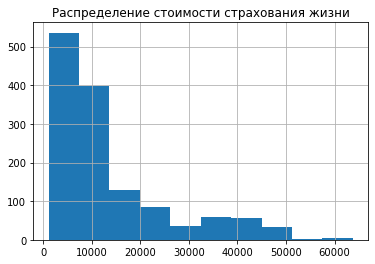

In [8]:
df.charges.hist()
plt.title("Распределение стоимости страхования жизни")
plt.show()

In [9]:
print('Средняя стоимость страховки:', df.charges.mean().round(2))
print('Медианная стоимость страховки:', df.charges.median().round(2))

Средняя стоимость страховки: 13270.42
Медианная стоимость страховки: 9382.03


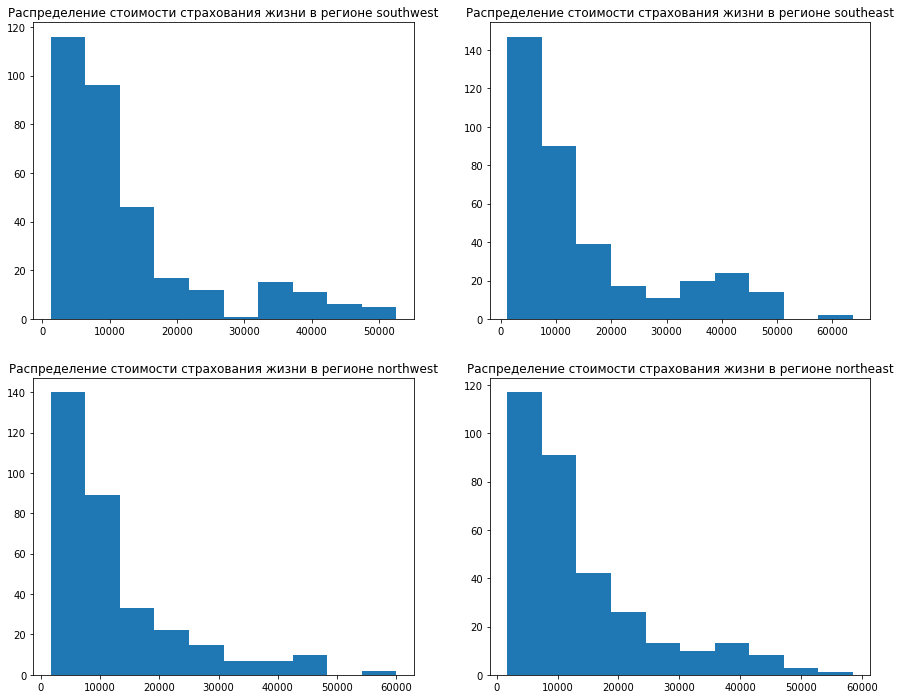

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
#for reg in df.region.unique():
n = 0
for i in range(2):
    for j in range(2):
        reg = df.region.unique()[n]
        ax[i][j].set_title('Распределение стоимости страхования жизни в регионе {}'.format(reg))
        ax[i][j].hist(df.charges[df.region == reg])
        n += 1
plt.show()    

In [11]:
df.groupby('region').charges\
    .agg([lambda x: x.mean().round(2), lambda x: x.median().round(2)])\
    .set_axis(['mean', 'median'], axis=1)

,mean,median
region,,
northeast,13406.38,10057.65
northwest,12417.58,8965.80
southeast,14735.41,9294.13
southwest,12346.94,8798.59


Распределение стоимости страхования по регионам имеет заметные различия, что может быть вызвано как различием региональных тарифов в области страхования, так и выбросами в имеющихся данных, которые значительно влияют на средние показатели в связи с небольшими размерами выборки

Сравним стоимость страхования жизни между мужчинами и женщинами

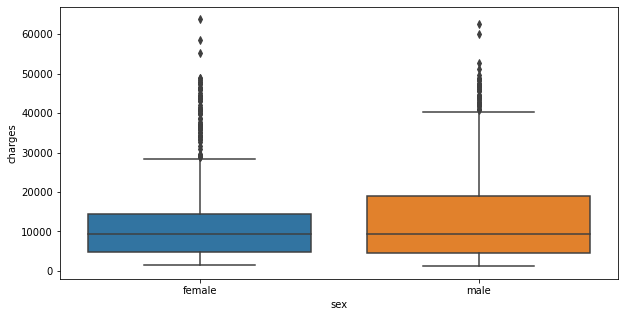

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='sex',y='charges', data=df)
plt.show()

Страховка мужчинам обходится дороже, проверим фактор курения и его влияние на стоимость страхования

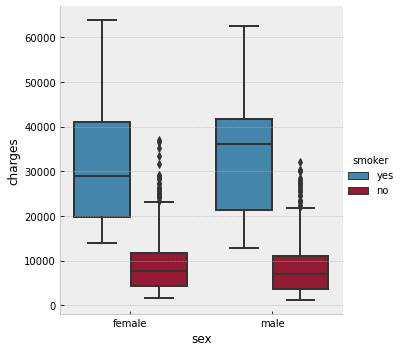

In [13]:
plt.style.use('bmh')
sns.catplot(x="sex", y="charges", hue="smoker", kind="box", data=df)

Страховка для некурящих мужчин стоит немного дешевле, чем для той же категории женщин, для категории курящих всё наоборот. Также видно, что курение является весомым фактором для увеличения стоимости страхования

Рассмотрим влияние индекса массы тела на стоимость страхования

<Figure size 720x576 with 0 Axes>

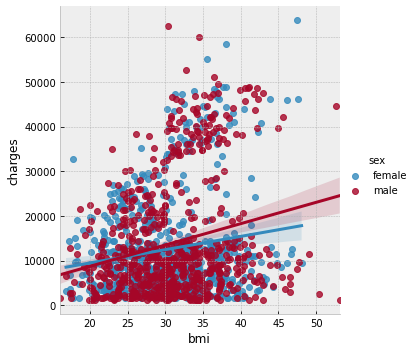

In [14]:
plt.figure(figsize=(10, 8))
sns.lmplot(x="bmi", y="charges", hue='sex', data=df)
plt.show()

<Figure size 720x576 with 0 Axes>

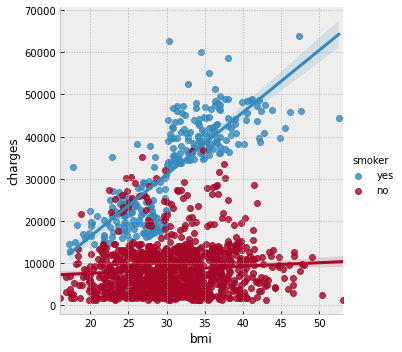

In [15]:
plt.figure(figsize=(10, 8))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df)
plt.show()

In [16]:
df[['bmi', 'charges']][df.smoker == 'yes'].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


Индекс массы тела не имеет сильного влияния на стоимость страхования, особенно для женщин. Но для курильщиков индекс массы тела сильно коррелирует с ценой страхования, также, если человек не курит, то стоимость страховки не превышает 40000 ни в одном случае.

Проверим, как сильно включение в страховку детей влияет на ее стоимость

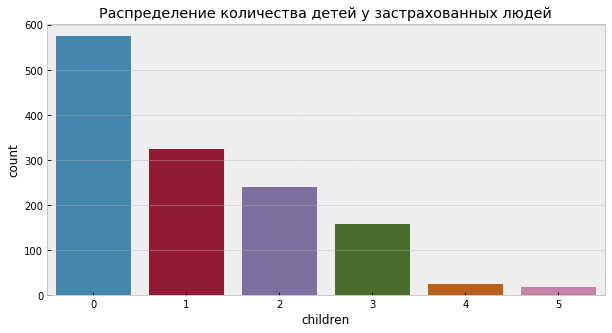

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(df.children, order=df.children.value_counts().index)
plt.title('Распределение количества детей у застрахованных людей')
plt.style.use('fivethirtyeight')
plt.show()

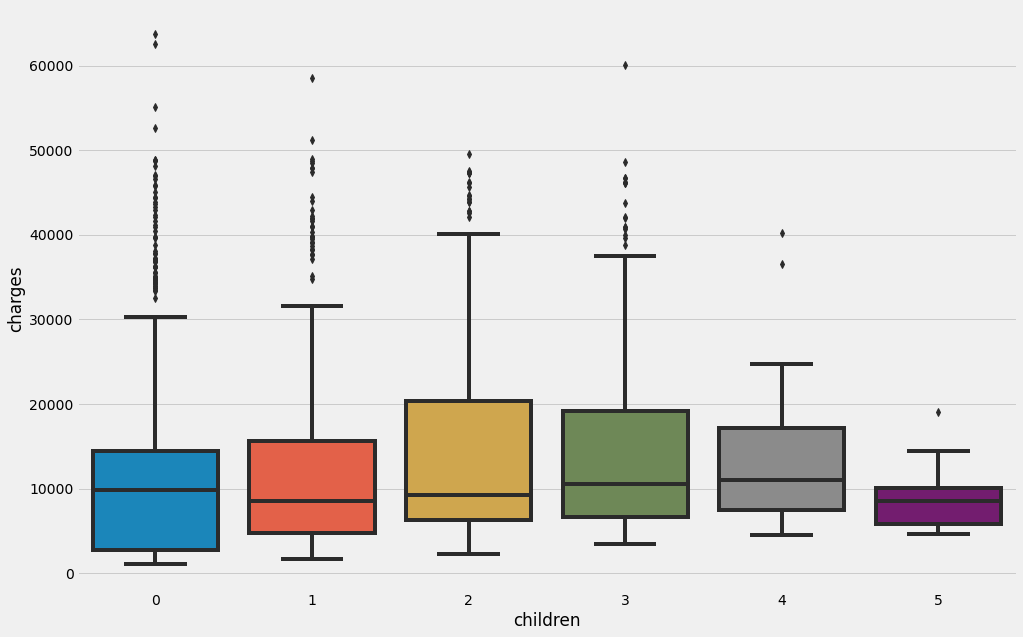

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='children',y='charges', data=df)
plt.show()

Стоимость страховки растет при появлении у человека детей, но с третьим ребенком в семье этот показатель начинает падать и средняя стоимость страхования для человека с 5 детьми наиболее низкая среди всех категорий. Причиной этому могут быть льготы для многодетных семей, необходимо ознакомиться с  действующим законодательством для проверки данного тезиса

Построим линейную модель, предсказывающую стоимость страхования жизни, для этого переведем категории пола и курения в бинарный вид 

sex: male = 0, female = 1

smoker: no = 0, yes = 1

для отражения влияния региона на стоимость применим One-hot кодирование

для отражения количества детей в модели также применим One-hot кодирование, т.к. график выше отражает нелинейную зависимость между количеством детей и ценой страховки

Подготовим данные

In [19]:
df.sex[df.sex == 'female'] = 1
df.sex[df.sex == 'male'] = 0
df.smoker[df.smoker == 'no'] = 0
df.smoker[df.smoker == 'yes'] = 1

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package s

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [21]:
df = pd.get_dummies(df, columns=['region', 'children'])

In [22]:
df.head()

,age,sex,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5
0,19,1,27.900,1,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,0,33.770,0,1725.55230,0,0,1,0,0,1,0,0,0,0
2,28,0,33.000,0,4449.46200,0,0,1,0,0,0,0,1,0,0
3,33,0,22.705,0,21984.47061,0,1,0,0,1,0,0,0,0,0
4,32,0,28.880,0,3866.85520,0,1,0,0,1,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df.charges, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((1003, 14), (335, 14))

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
pd.DataFrame(data={'feature': list(X_train.columns), 'coef': lr.coef_}).sort_values('coef', ascending=False)

,feature,coef
3,smoker,23645.824904
12,children_4,2376.726175
10,children_2,605.794977
4,region_northeast,544.600571
5,region_northwest,335.080468
2,bmi,330.256093
0,age,249.651721
1,sex,-25.876718
7,region_southwest,-332.160196
11,children_3,-423.359849


In [29]:
lr.intercept_

-10863.204632056708

In [30]:
lr.score(X_test, y_test)

0.7940111231716588

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
print('mean_squared_error', mean_squared_error(y_test, y_pred).round(2))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred).round(2))
print('r2_score', lr.score(X_test, y_test).round(2))

mean_squared_error 32429758.46
mean_absolute_error 4059.02
r2_score 0.79


Точность модели составляет 79%, но коэффициенты при показателях и средние ошибки имеют слишком большие значения, модель переобучена, попробуем исправить это с помощью регуляризации. Используем Ridge-модель, включающую в себя L2-регуляризацию

In [33]:
from sklearn.linear_model import Ridge

In [34]:
Rd = Ridge()
Rd.fit(X_train, y_train)

Ridge()

In [35]:
y_pred = Rd.predict(X_test)

In [36]:
pd.DataFrame(data={'feature': list(X_train.columns), 'coef': Rd.coef_}).sort_values('coef', ascending=False)

,feature,coef
3,smoker,23495.376633
12,children_4,2244.377078
10,children_2,627.808150
4,region_northeast,543.292115
2,bmi,329.849564
5,region_northwest,329.576494
0,age,249.470938
1,sex,-32.773930
7,region_southwest,-336.853002
11,children_3,-390.278507


In [37]:
Rd.intercept_

-10829.330315946629

In [38]:
print('mean_squared_error', mean_squared_error(y_test, y_pred).round(2))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred).round(2))
print('r2_score', Rd.score(X_test, y_test).round(2))

mean_squared_error 32453507.13
mean_absolute_error 4071.05
r2_score 0.79


In [39]:
Rd.score(X_test, y_test)

0.7938602752953704

Коэффициенты признаков уменьшились, но при этом ошибка модели немного выросла, а точность снизилась незначительно (на 0.1%) 


Проверим, как с задачей предсказания стоимости страховки справится нелинейная модель

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
clf = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [42]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [43]:
y_pred = clf.predict(X_test)

In [44]:
pd.DataFrame(data={'feature': list(X_train.columns), 'importance': clf.feature_importances_})\
            .sort_values('importance', ascending=False)

,feature,importance
3,smoker,0.557481
2,bmi,0.176434
0,age,0.173749
1,sex,0.014710
10,children_2,0.010819
6,region_southeast,0.010724
8,children_0,0.010263
4,region_northeast,0.009528
7,region_southwest,0.008979
9,children_1,0.008800


In [45]:
print('mean_squared_error', mean_squared_error(y_test, y_pred).round(2))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred).round(2))
print('r2_score', clf.score(X_test, y_test).round(2))

mean_squared_error 23306190.18
mean_absolute_error 3265.72
r2_score 0.85


Проверим, можно ли улучшить точность модели, изменив некоторые параметры

In [46]:
Q = []
for n_est in range(1, 200, 2):
  clf_2 = RandomForestRegressor(n_estimators=n_est, max_features='sqrt')
  clf_2.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf_2.predict(X_test)))


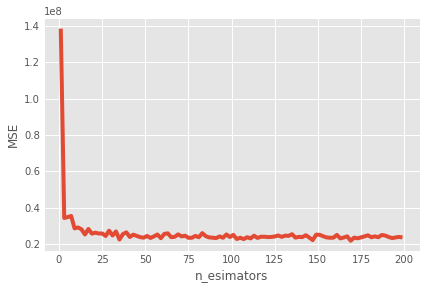

In [47]:
plt.style.use('ggplot')
plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_esimators')
plt.ylabel('MSE')
plt.show()

In [48]:
Q = []
for max_feat in range(1, 15):
  clf_3 = RandomForestRegressor(n_estimators=100, max_features=max_feat)
  clf_3.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf_3.predict(X_test)))


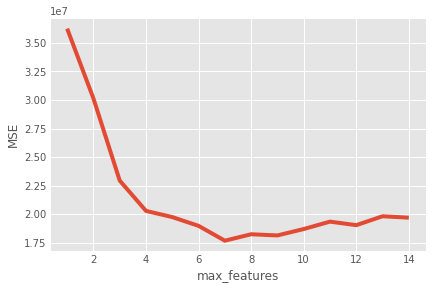

In [49]:
plt.plot(range(1, 15), Q)
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.show()

Количество деревьев в модели можно оставить в количестве 100, а max_features увеличим до 6 и проверим точность модели

In [50]:
clf = RandomForestRegressor(n_estimators=100, max_features=7)

In [51]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_features=7)

In [52]:
y_pred = clf.predict(X_test)

In [53]:
print('mean_squared_error', mean_squared_error(y_test, y_pred).round(2))
print('mean_absolute_error', mean_absolute_error(y_test, y_pred).round(2))
print('r2_score', clf.score(X_test, y_test).round(2))

mean_squared_error 17733753.7
mean_absolute_error 2631.48
r2_score 0.89


Точность модели увеличилась и составила 89%

In [54]:
feature_imp = pd.DataFrame({'importances': clf.feature_importances_, 'feature':list(X_train.columns)})

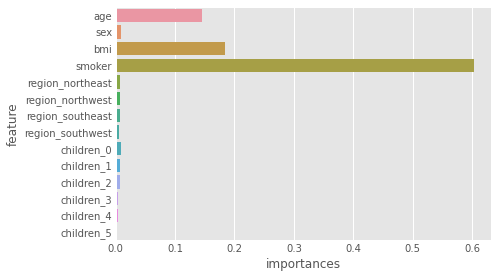

In [55]:
sns.barplot(x="importances", y="feature", data=feature_imp)

Наиболее важными признаками в Random Forest являются курение, индекс массы тела и возраст, в линейных моделях курение также сильнее всего влияет на результат, но индекс массы тела и возраст уступают количеству детей и частично региону проживания

Таким образом, были построены несколько моделей предсказания стоимости страхования жизни, наиболее точный результат показала модель Random Forest (89% точности), превышающий показатели линейных моделей на 10%, т.к. признаки по отдельности (за исключением курения) имеют слабую линейную связь с целевым значением, а Random Forest наиболее полно и точно учитывает имеющиеся зависимости